**Kelompok 2 :**
1. Aliffio Syah M - 41519120065
2. Khairul Sholech - 41519120068
3. Reza Arrofi - 41519120044
4. Nurhasanah Nasution - 41518110231
5. Syaiful Alim - 41519120021
6. Fauzan Ardiansyah - 41519120028
7. Chris Moulana B - 41517110052

Link Youtube yang kami ambil untuk metode Hierarchial Clustering sebagai berikut :
https://www.youtube.com/watch?v=8CspXXhAtZQ

Nama Channel : FUN Learning Everyday

Judul Video : DATA CLUSTERING metode Hierarchical clustering menggunakan Python Google Colabs - AKK2020

In [1]:
# menginstall package kaggle menggunakan pip (python package-management system)
!pip install kaggle
# import fungsi drive dari module colab dari package google
from google.colab import files
# upload files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"khairsholech","key":"f9e1bf5b16a2e52462b648f2d24cb38d"}'}

In [2]:
# membuat direktori dengan nama kaggle
!mkdir -p ~/.kaggle
# copy file kaggle.json dan paste didalam direktori kaggle
!cp kaggle.json ~/.kaggle/

# ubah permission file kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# download ccdata dari kaggle
!kaggle datasets download -d arjunbhasin2013/ccdata

  0% 0.00/340k [00:00<?, ?B/s]
100% 340k/340k [00:00<00:00, 98.6MB/s]


In [4]:
# extract file ccdata.zip
!unzip ccdata.zip

Archive:  ccdata.zip
replace CC GENERAL.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: CC GENERAL.csv          


In [1]:
# import package numpy digunakan untuk bekerja dengan array yang didefinisikan dengan variable np
import numpy as np
# import package pandas digunakan untuk membaca file csv, menampilkan tabel dan didefinisikan sebagai variable pd
import pandas as pd
# import module pyplot dari package matplotlib untuk membuat beberapa perubahan pada gambar yang didefinisikan dengan variable 'plt'
import matplotlib.pyplot as plt
# import package seaborn untuk menampilkan visualisasi data statistik yang didefinisikan dengan variable sns
import seaborn as sns

#Berikut merupakan library untuk melakukan hierarchial Clustering
# import fungsi AgglomerativeClustering dari module cluster dari package sklearn.cluster
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# import silhouette_score untuk mengukur kualitas cluster yang terbentuk
from sklearn.metrics import silhouette_score
# import StandarCaler digunakan untuk melakukan preprocessing : menyeragamkan rentang nilai data pada dataset
from sklearn.preprocessing import StandardScaler

# import PCA dan cosine_similarity digunakan untuk reduksi fungsi data sehingga dapat dilakukan visualisasi 2 dimensi
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# set variable dataset dengan membaca file CC GENERAL.csv
dataset = pd.read_csv('/content/CC GENERAL.csv')

In [3]:
# menampilkan dataset
dataset

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
# menghapus kolom cust_id
dataset.drop('CUST_ID', axis=1, inplace=True)

In [5]:
# pengecekan nilai null pada dataset
dataset.isnull().sum().sort_values(ascending=False).head()

MINIMUM_PAYMENTS          313
CREDIT_LIMIT                1
BALANCE                     0
CASH_ADVANCE_FREQUENCY      0
PRC_FULL_PAYMENT            0
dtype: int64

In [6]:
# mengisi nilai null pada dataset dengan nilai mean kolom tersebut
dataset.loc[(dataset['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=dataset['MINIMUM_PAYMENTS'].mean()
dataset.loc[(dataset['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=dataset['CREDIT_LIMIT'].mean()

dataset.isnull().sum().sort_values(ascending=False).head()

BALANCE                   0
CASH_ADVANCE_FREQUENCY    0
PRC_FULL_PAYMENT          0
MINIMUM_PAYMENTS          0
PAYMENTS                  0
dtype: int64

In [7]:
# preprocessing dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

df = pd.DataFrame(scaled_data, columns = dataset.columns)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


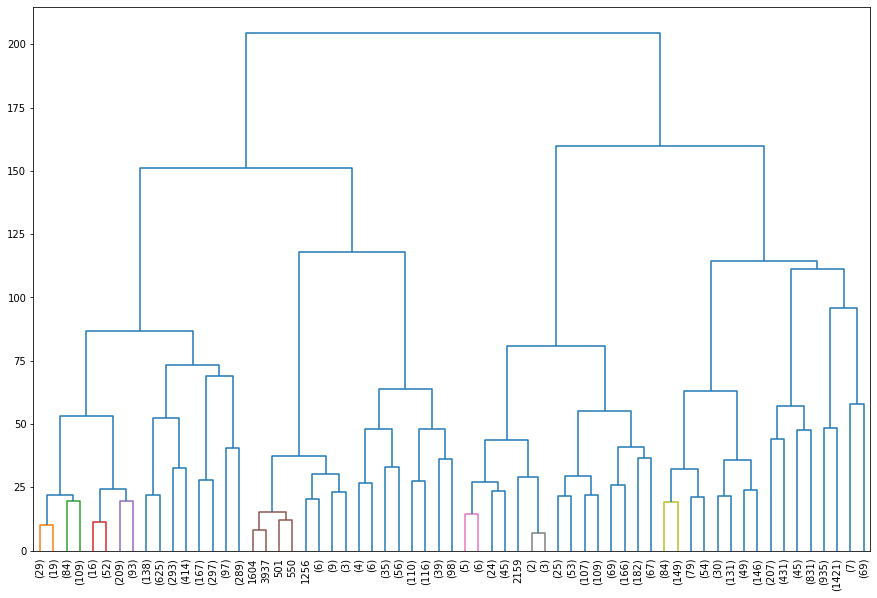

In [8]:
# visualisasi dendogram
plt.figure(figsize=(15,10))
dendrogram(linkage(df,method="ward"), leaf_rotation=90, p=5, color_threshold=20, leaf_font_size=10, truncate_mode='level')
plt.show()

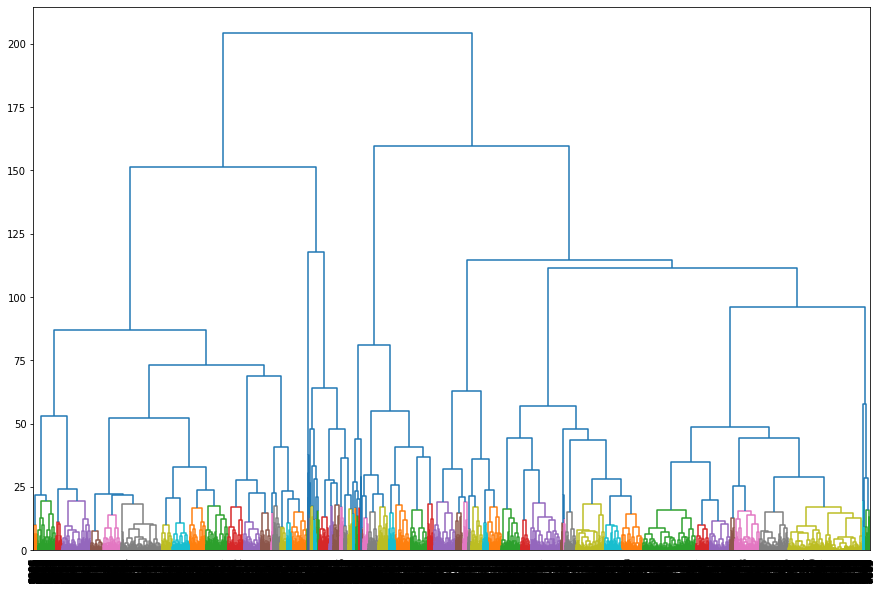

In [20]:
# visualisasi dendogram
plt.figure(figsize=(15,10))
dendrogram(linkage(df,method="ward"), leaf_rotation=90, p=5, color_threshold=20, leaf_font_size=10, truncate_mode='none')
plt.show()

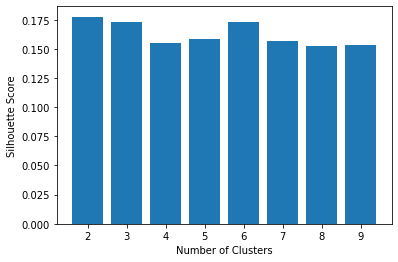

In [9]:
# mencari jumlah cluster dengan silhouette scores
silhouette_scores = []

for n_cluster in range(2,10):
  silhouette_scores.append(silhouette_score(df, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(df)))
    
plt.bar(range(2, 10), silhouette_scores)
plt.xlabel('Number of Clusters', fontsize = 10)
plt.ylabel('Silhouette Score', fontsize = 10)
plt.show()

In [10]:
# agglomerative Clustering dengan jumlah cluster = 2
agglo = AgglomerativeClustering(n_clusters=2)
agglo.fit(df)
labels = agglo.labels_
hasil_agglo = pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
hasil_agglo.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068,0
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068,0
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068,1
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.36068,0
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068,0


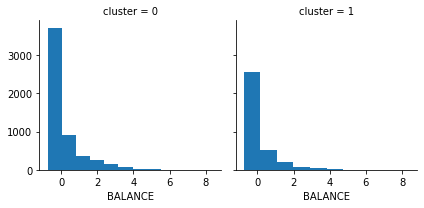

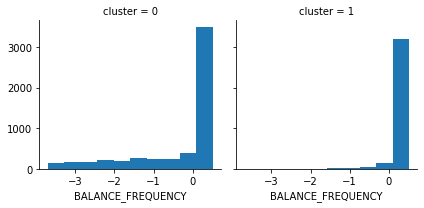

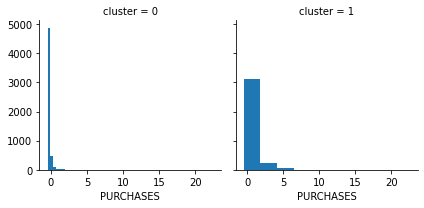

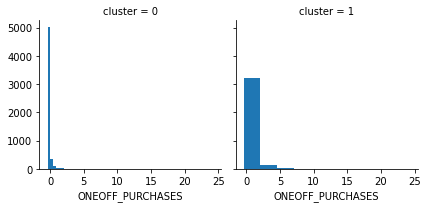

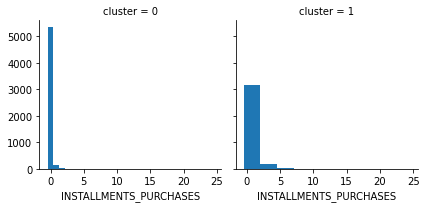

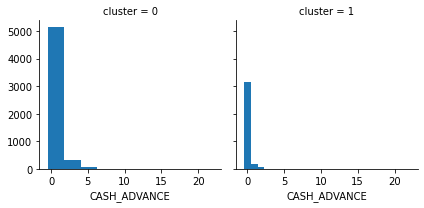

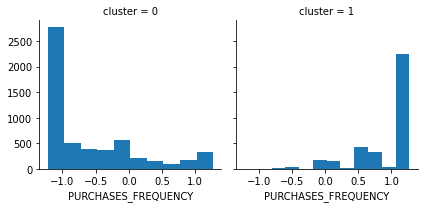

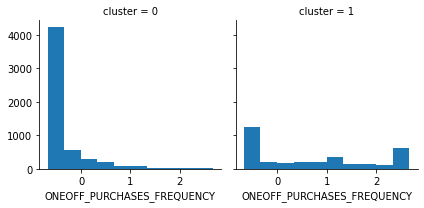

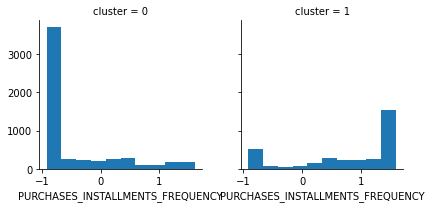

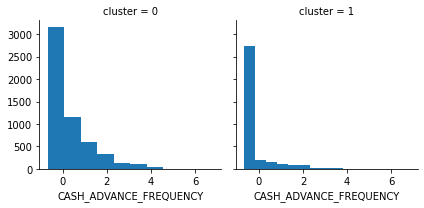

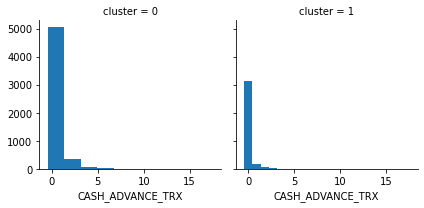

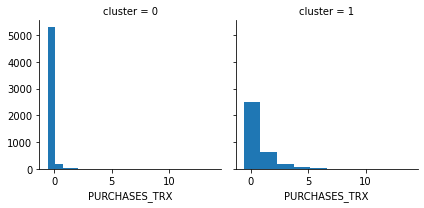

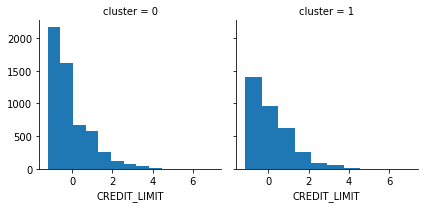

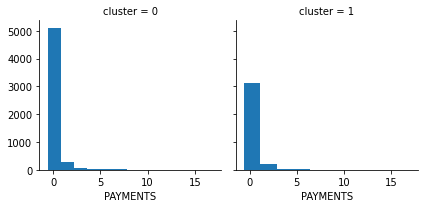

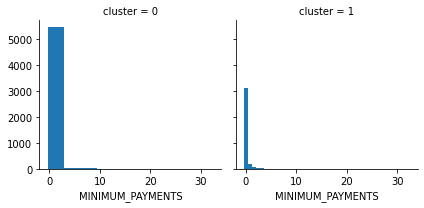

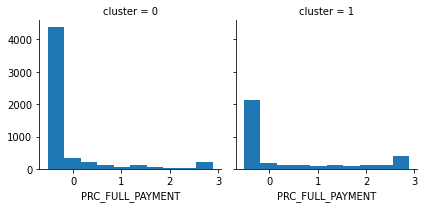

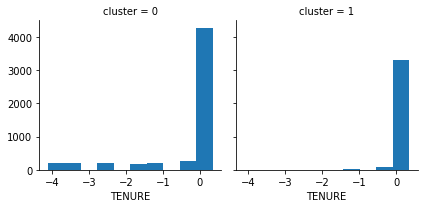

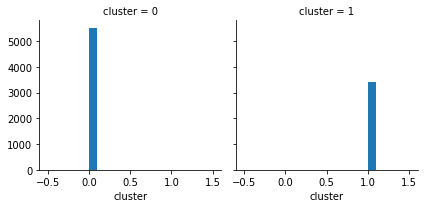

In [11]:
# visualisasi hasil agglomerative clustering
for i in hasil_agglo:
  grid = sns.FacetGrid(hasil_agglo, col='cluster')
  grid.map(plt.hist, i)

In [12]:
# dekomposisi PCA
dist = 1 - cosine_similarity(df)

pca = PCA(n_components = 2)
pca = pca.fit_transform(dist)
# X_PCA.shape

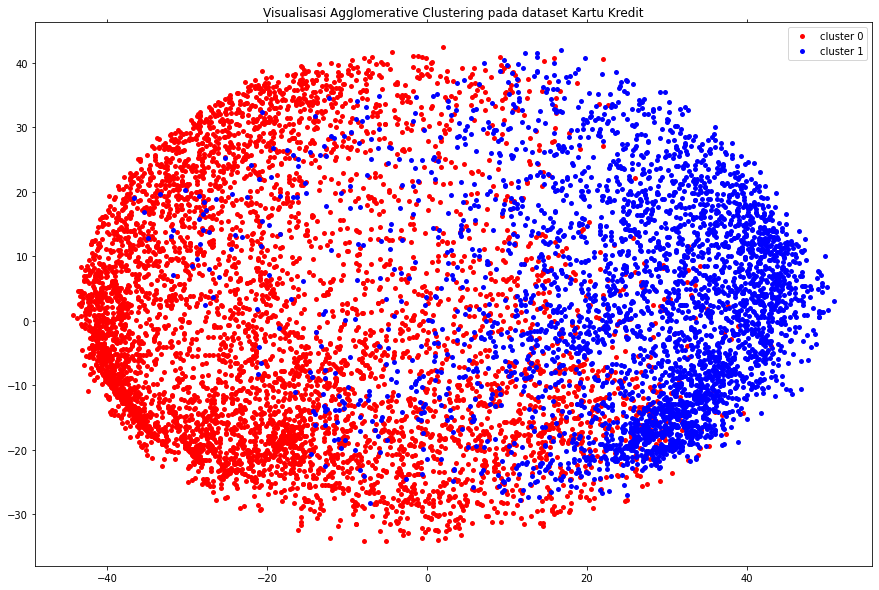

In [13]:
# visualisasi penyebaran agglomerative clustering
x, y = pca[:, 0], pca[:, 1]

warna = {0: 'red',
          1: 'blue',
          2: 'green'}

label_pca = {0: 'cluster 0',
             1: 'cluster 1',
             2: 'cluster 2'}

df = pd.DataFrame({'x':x, 'y':y,'label':labels})
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(15, 10))

for name, group in groups:
  ax.plot(group.x, group.y, marker='o', linestyle='', ms = 5,
          color=warna[name], label=label_pca[name], mec='none')
  ax.set_aspect('auto')
  ax.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
  ax.tick_params(axis='y', which='both', left='off', top='off', labelleft='off')

ax.legend()
ax.set_title("Visualisasi Agglomerative Clustering pada dataset Kartu Kredit")
plt.show()
